In [15]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from attention import Attention

In [40]:
# Load the dataset
df = pd.read_csv("./USDT.csv")

# Drop the unnecessary columns.
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Format the 'Date' column
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
                                    
# Sort the DataFrame by date
df = df.sort_values('Date')
df.index = np.arange(0, len(df))
df

,Date,Price
0,2017-12-01,1.0100
1,2017-12-02,0.9959
2,2017-12-03,0.9977
3,2017-12-04,1.0000
4,2017-12-05,1.0000
...,...,...
1942,2023-03-28,1.0001
1943,2023-03-29,0.9999
1944,2023-03-30,1.0000
1945,2023-03-31,1.0001


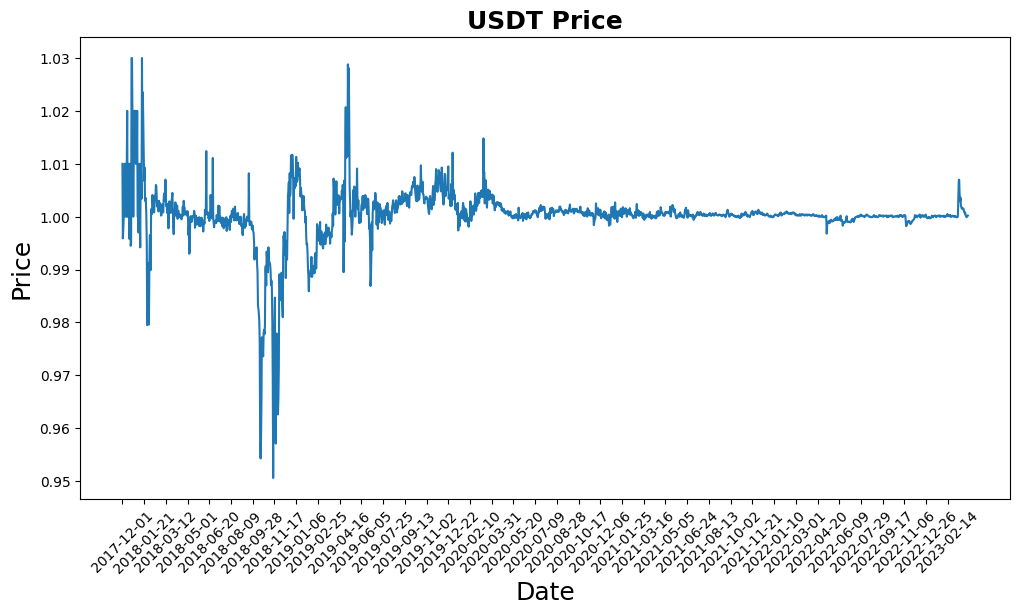

In [39]:
# Illustrated diagram

plt.figure(figsize = (12,6))
plt.plot(price)
plt.xticks(range(0, df.shape[0],50), df['Date'].loc[::50],rotation=45)
plt.title("USDT Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [41]:
price = np.array(df[['Price']])
price

array([[1.01  ],
       [0.9959],
       [0.9977],
       ...,
       [1.    ],
       [1.0001],
       [1.0002]])

In [43]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

train, test = price[0:train_size,:], price[train_size:len(df),:]
print(len(train), len(test))

1557 390


In [44]:
# Convert the array of values to the matrix of dataset
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [45]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1553, 3)
(1553,)
(386, 3)
(386,)


In [48]:
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))
print("Train shape: ", trainX.shape)
print("Test shape:", testX.shape)

Train shape:  (1553, 3, 1)
Test shape: (386, 3, 1)


In [82]:
model = Sequential([
    SimpleRNN(100, return_sequences=True, input_shape=(look_back, n_features)),
    Attention(),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 3, 100)            10200     
                                                                 
 attention_9 (Attention)     (None, 128)               35600     
                                                                 
 dense_20 (Dense)            (None, 32)                4128      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 49,961
Trainable params: 49,961
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(trainX, trainY, batch_size=1, epochs=10)

Epoch 1/10
1553/1553 [==============================] - 8s 4ms/step - loss: 0.0013 - accuracy: 0.0451
Epoch 2/10
1553/1553 [==============================] - 6s 4ms/step - loss: 1.0299e-04 - accuracy: 0.0451
Epoch 3/10
1553/1553 [==============================] - 5s 4ms/step - loss: 1.0264e-04 - accuracy: 0.0451
Epoch 4/10
1553/1553 [==============================] - 7s 4ms/step - loss: 9.3091e-05 - accuracy: 0.0451
Epoch 5/10
1553/1553 [==============================] - 6s 4ms/step - loss: 8.3403e-05 - accuracy: 0.0451
Epoch 6/10
1553/1553 [==============================] - 7s 4ms/step - loss: 8.1450e-05 - accuracy: 0.0451
Epoch 7/10
1553/1553 [==============================] - 6s 4ms/step - loss: 6.6395e-05 - accuracy: 0.0451
Epoch 8/10
1553/1553 [==============================] - 7s 4ms/step - loss: 5.7360e-05 - accuracy: 0.0451
Epoch 9/10
1553/1553 [==============================] - 5s 4ms/step - loss: 7.3090e-05 - accuracy: 0.0451
Epoch 10/10
1553/1553 [===========================

In [84]:
rnn_predict = model.predict(testX)
rnn_predict.reshape(-1,1)

13/13 [==============================] - 0s 3ms/step


array([[1.0057263],
       [1.0056505],
       [1.0056906],
       [1.0056117],
       [1.005694 ],
       [1.0057263],
       [1.005733 ],
       [1.005764 ],
       [1.0057377],
       [1.0057377],
       [1.0057377],
       [1.0056553],
       [1.0057056],
       [1.0056484],
       [1.0057158],
       [1.0057113],
       [1.0057377],
       [1.0056553],
       [1.0057056],
       [1.0056896],
       [1.00567  ],
       [1.005701 ],
       [1.0057158],
       [1.00567  ],
       [1.0056597],
       [1.0056384],
       [1.0056117],
       [1.0056529],
       [1.0056072],
       [1.0056794],
       [1.0056484],
       [1.0057572],
       [1.0056655],
       [1.0056862],
       [1.0056384],
       [1.0055704],
       [1.0056161],
       [1.0055853],
       [1.0056529],
       [1.005566 ],
       [1.0056013],
       [1.0055901],
       [1.0055441],
       [1.0055338],
       [1.0055945],
       [1.0055591],
       [1.0055293],
       [1.0055382],
       [1.0054855],
       [1.0054855],


In [85]:
testY = testY.reshape(-1,1)
testY.shape

(386, 1)

In [86]:
date = pd.to_datetime(df.Date)
date = date[(len(date)-len(testY)):]
date

1561   2022-03-12
1562   2022-03-13
1563   2022-03-14
1564   2022-03-15
1565   2022-03-16
          ...    
1942   2023-03-28
1943   2023-03-29
1944   2023-03-30
1945   2023-03-31
1946   2023-04-01
Name: Date, Length: 386, dtype: datetime64[ns]

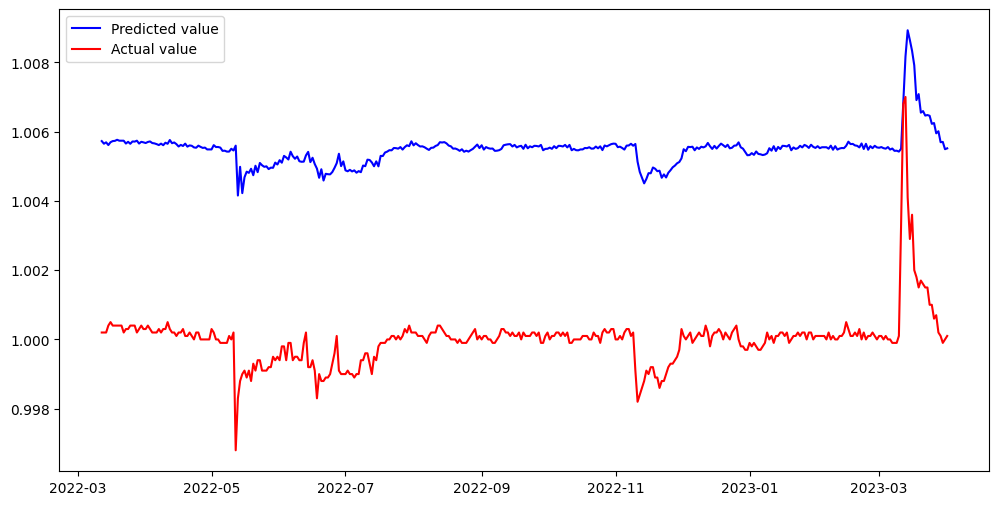

In [87]:
fig= plt.figure(figsize=(12,6))
plt.plot(date,rnn_predict,color='blue', label='Predicted value')
plt.plot(date,testY,color='red', label='Actual value')
plt.legend()
plt.show()

In [88]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [91]:
#MAPE
mean_absolute_percentage_error(testY, rnn_predict)

0.5485239389358594

In [90]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(testY, rnn_predict)
RMSE = math.sqrt(MSE)
print(RMSE)

0.005507111029514553
